In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 取数据
def loadData(filename,r):
    """加载数据集"""
    for line in open(filename):
        user,item,record,timestamp = line.split()
        r[int(user)-1,int(item)-1] = int(record)
    return r


r_train = np.zeros([943,1682])
for i in range(1):
    r_train = loadData('u'+str(i+1)+'.base',r_train)
    
r_test = np.zeros([943,1682])
for i in range(1):
    r_test = loadData('u'+str(i+1)+'.test',r_test)

The number of iterations in convergence:73
final training loss:1.828903, final training accuracy:0.742725
final testing  loss:1.970659, final testing  accuracy:0.707200


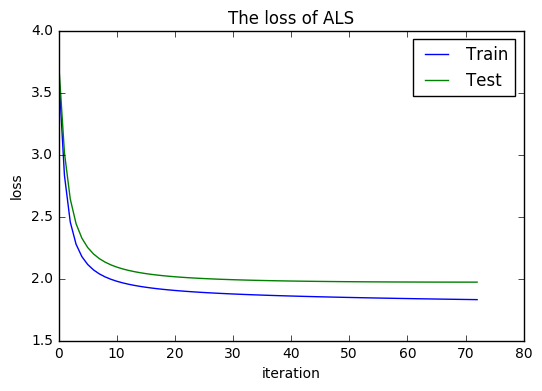

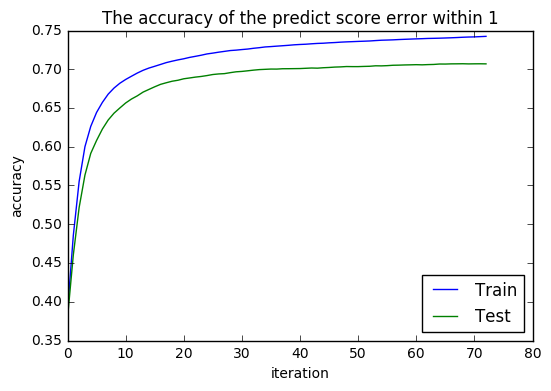

In [27]:
k = 10
n=500
# 初始化
p_user = np.random.rand(943,k)
q_item = np.random.rand(1682,k)
loss=np.zeros(n)
loss_te=np.zeros(n)
acc_ta=np.zeros(n)
acc_te=np.zeros(n)
lb = 0.0001
ta = r_train!=0
te = r_test!=0
for i in range(n):
    # 初始化梯度
    g_user = np.zeros([943,k])
    g_item = np.zeros([1682,k])
    delta = np.zeros([943,1682])
    # 预测结果
    r_pre = p_user.dot(q_item.T)
    delta[ta] = r_pre[ta]-r_train[ta]
    # 计算训练集误差
    loss[i] = sum(sum(delta**2))/80000+lb*(sum(sum(p_user**2))+sum(sum(q_item**2)))
    g_user = delta.dot(q_item)+2*lb*(p_user**2//2)
    g_item = delta.T.dot(p_user)+2*lb*(q_item**2//2)
    # 更新P，Q
    p_user = p_user-0.0005*g_user
    q_item = q_item-0.0005*g_item
    # 计算训练集预测精确度
    acc_ta[i]=1-len(delta[delta**2>1])/80000
    # 计算验证集误差
    delta_te = np.zeros([943,1682])
    delta_te[te] = r_pre[te]-r_test[te]
    loss_te[i] = sum(sum(delta_te**2))/20000+lb*(sum(sum(p_user**2))+sum(sum(q_item**2)))
    # 计算验证集预测精确度
    acc_te[i]=1-len(delta_te[delta_te**2>1])/20000
    
    if((i>1) & (loss_te[i-1]-loss_te[i]<1e-6)):
        break
    
print("The number of iterations in convergence:%d" %i)
print("Final training loss:%f, final training accuracy:%f" %(loss[i],acc_ta[i]))
print("Final testing  loss:%f, final testing  accuracy:%f" %(loss_te[i],acc_te[i]))
plt.figure(1)
plt.plot(loss[0:i],label='Train')
plt.plot(loss_te[0:i],label='Test')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('The loss of ALS')
plt.legend()
plt.show()


plt.figure(2)
plt.plot(acc_ta[0:i],label='Train')
plt.plot(acc_te[0:i],label='Test')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('The accuracy of the predict score error within 1')
plt.legend(loc='lower right')
plt.show()